In [1]:
from functools import partial
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import jax.scipy.integrate as inte

n = 3
inverse_density = 2 / n
# make triangle grid
normal_x_row = jnp.linspace(-1, 1, n)
staggered_x_row = jnp.linspace(-1 + inverse_density / 2, 1 - inverse_density / 2, n - 1)
# normal_y_column = ((jnp.linspace(-1, 1, n) + 1) ** 3) / (8 / 2) - 1
normal_y_column = jnp.linspace(-1, 1, n)

# now make the grid, taking alternating rows of the staggered grid and always the y column
vertices = []
for i, y in enumerate(normal_y_column):
    if i % 2 == 0:
        vertices.extend(
            jnp.column_stack((normal_x_row, jnp.ones_like(normal_x_row) * y))
        )
    else:
        vertices.extend(
            jnp.column_stack((staggered_x_row, jnp.ones_like(staggered_x_row) * y))
        )

vertices = jnp.array(vertices)

finished triangulation
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
Not a triangle
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
not none
no

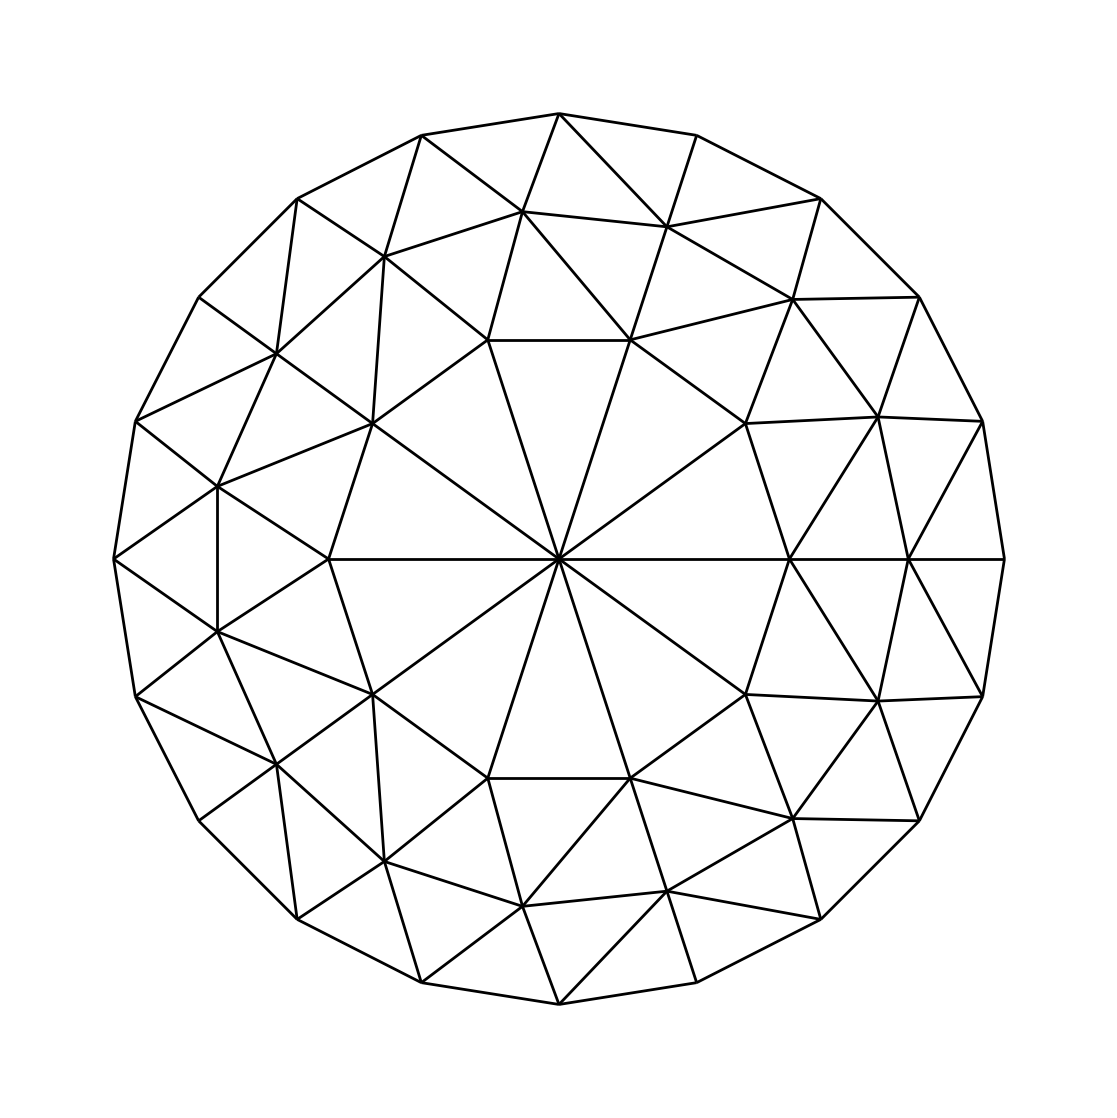

In [20]:
import networkx as nx

graph = nx.Graph()
import matplotlib.tri as tri

import scipy.spatial as sp

triang = sp.Delaunay(vertices)
print("finished triangulation")

# get all edges from the triangulation
edges = set()
for triangle in triang.simplices:
    for i in range(3):
        for j in range(i + 1, 3):
            edges.add((triangle[i], triangle[j]))

edges = list(edges)

from discrete_exterior_calculus import DEC, triangulate, metrics

metric = metrics.hyperbolic_metric

# mesh = DEC.Mesh(vertices=vertices, faces=triang.simplices, lazy=True)
mesh = DEC.Mesh.from_obj("../meshes/small-disc.obj", lazy=True)


distance_map = {}
for edge in edges:
    p1 = edge[0]
    p2 = edge[1]

    distance = metrics.measure_distance(
        mesh.vertices[p1, [0, 2]], mesh.vertices[p2, [0, 2]], metric
    )
    distance_map[triangulate.edge(p1, p2)] = distance
    graph.add_edge(p1, p2, weight=distance)

pos = {i: point[[0, 2]] for i, point in enumerate(mesh.vertices)}

# new_faces_and_lengths, new_vertices = triangulate.triangulate_mesh_with_edge_distances(
#     mesh, distance_map
# )
new_faces_and_lengths, new_vertices = triangulate.add_distances_to_mesh_with_metric(
    mesh, metric, max_subdivs=2000
)
new_graph = nx.Graph()
added = set()
for (a, b, c), (A, B, C) in new_faces_and_lengths.items():
    for i, j, dist in [(a, b, C), (b, c, A), (c, a, B)]:
        if (i, j) in added:
            continue
        added.add((i, j))
        new_graph.add_edge(i, j, weight=dist)

new_pos = {i: point for i, point in enumerate(vertices)}

new_mesh = DEC.Mesh(
    vertices=new_vertices, faces=list(new_faces_and_lengths.keys()), lazy=True
)


def draw_graph_with_edge_weights(ax, graph, position):
    ax.set_aspect("equal")
    nx.draw(graph, pos=position, with_labels=False, node_size=0, ax=ax)
    # edge_labels = {
    #     key: str(value)[:4]
    #     for key, value in nx.get_edge_attributes(graph, "weight").items()
    # }
    # nx.draw_networkx_edge_labels(
    #     graph, position, edge_labels=edge_labels, ax=ax, font_size=8
    # )


fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=200)
draw_graph_with_edge_weights(ax, graph, mesh.vertices[:, [0, 2]])

# draw_graph_with_edge_weights(ax, new_graph, new_vertices)
fig.savefig(
    "../markdown/latex/images/hyperbolic_disc_before_refinement.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
    pad_inches=0.1,
)
plt.show();

In [3]:
original_faces_and_lengths, vertices = triangulate.add_distances_to_mesh_with_metric(
    mesh, metric, max_subdivs=0
)

embedded_vertices = jnp.array([metrics.embed_to_bell(vertex) for vertex in vertices])
embedded_vertices = jnp.stack(
    (embedded_vertices[:, 0], embedded_vertices[:, 2], embedded_vertices[:, 1]), axis=0
).T

mesh = DEC.Mesh(
    vertices=embedded_vertices, faces=list(original_faces_and_lengths.keys()), lazy=True
)

mesh.dump_to_JSON(
    "bell_initial.json",
    {"Y": embedded_vertices[:, 1]},
    folder="../produced_solutions",
)

made 0 new splits
here .


In [4]:
embedded_vertices = jnp.array(
    [metrics.embed_to_bell(new_vertex) for new_vertex in new_vertices]
)
embedded_vertices = jnp.stack(
    (embedded_vertices[:, 0], embedded_vertices[:, 2], embedded_vertices[:, 1]), axis=0
).T


new_mesh = DEC.Mesh(
    vertices=embedded_vertices, faces=list(new_faces_and_lengths.keys()), lazy=True
)

new_mesh.dump_to_JSON(
    "bell_triangulated.json",
    {"Y": embedded_vertices[:, 1]},
    folder="../produced_solutions",
)

here .


In [5]:
import networkx as nx

graph = nx.Graph()
import matplotlib.tri as tri

import scipy.spatial as sp

triang = sp.Delaunay(vertices)
print("finished triangulation")

# get all edges from the triangulation
edges = set()
for triangle in triang.simplices:
    for i in range(3):
        for j in range(i + 1, 3):
            edges.add((triangle[i], triangle[j]))

edges = list(edges)

from discrete_exterior_calculus import DEC, triangulate

mesh = DEC.Mesh(vertices=vertices, faces=triang.simplices, lazy=True)


distance_map = {}
for edge in edges:
    p1 = edge[0]
    p2 = edge[1]

    distance = metrics.measure_distance(vertices[p1], vertices[p2])
    distance_map[triangulate.edge(p1, p2)] = distance
    graph.add_edge(p1, p2, weight=distance)

pos = {i: point for i, point in enumerate(vertices)}

new_faces_and_lengths, new_vertices = triangulate.triangulate_mesh_with_edge_distances(
    mesh, distance_map
)
print("finished subvidision")

new_graph = nx.Graph()
added = set()
for (a, b, c), (A, B, C) in new_faces_and_lengths.items():
    for i, j, dist in [(a, b, C), (b, c, A), (c, a, B)]:
        if (i, j) in added:
            continue
        added.add((i, j))
        # ordered = triangulate.edge(a,b)
        new_graph.add_edge(i, j, weight=dist)

new_pos = {i: point for i, point in enumerate(vertices)}

new_mesh = DEC.Mesh(
    vertices=new_vertices, faces=list(new_faces_and_lengths.keys()), lazy=True
)


def draw_graph_with_edge_weights(ax, graph, position):
    ax.set_aspect("equal")
    nx.draw(graph, pos=position, with_labels=False, node_size=0, ax=ax)
    edge_labels = {
        key: str(value)[:4]
        for key, value in nx.get_edge_attributes(graph, "weight").items()
    }
    nx.draw_networkx_edge_labels(
        graph, position, edge_labels=edge_labels, ax=ax, font_size=8
    )


fig, ax = plt.subplots(1, 3, figsize=(40, 40), dpi=200)

draw_graph_with_edge_weights(ax[0], graph, vertices)
draw_graph_with_edge_weights(ax[1], new_graph, new_vertices)
draw_graph_with_edge_weights(ax[2], new_graph, new_vertices * [0.5, 1.0])


plt.show();

finished triangulation


TypeError: measure_distance() missing 1 required positional argument: 'metric'

In [ ]:
V, F = vertices, triang.simplices
import intrinsic_triang as iDT

# use this line to run on your own mesh of interest
# V, F = pp3d.read_mesh(
#     "/Users/theoruterwurtzen/Desktop/MSc Thesis/code/app/terrain8k.obj"
# )

# initialize the glue map and edge lengths arrays from the input data
G = iDT.build_gluing_map(F)
l = iDT.build_edge_lengths(V, F)

print("Initial mesh:")
iDT.print_info(F, G, l)

# make a copy (so we preserve the original mesh), and flip to Delaunay
F_delaunay = F.copy()
G_delaunay = G.copy()
l_delaunay = l.copy()
iDT.flip_to_delaunay(F_delaunay, G_delaunay, l_delaunay)

print("After Delaunay flips:")
iDT.print_info(F_delaunay, G_delaunay, l_delaunay)

In [ ]:
from discrete_exterior_calculus import dijkstra

fig, ax = plt.subplots(1, 2, figsize=(40, 40), dpi=100)


def show_wave_propagation(start_pos, graph, vertices, simplices, ax):
    ax.set_aspect("equal")
    distances = dijkstra.dijkstra(start_pos, graph, vertices)
    print("finished dijkstra")
    distances = jnp.sin(distances * jnp.pi * 8)

    ax.tripcolor(
        vertices[:, 0], vertices[:, 1], simplices, distances, shading="gouraud"
    )


show_wave_propagation(jnp.array([0.5, 0.5]), graph, vertices, triang.simplices, ax[0])
show_wave_propagation(
    jnp.array([0.5, 0.5]),
    new_graph,
    new_vertices,
    list(new_faces_and_lengths.keys()),
    ax[1],
)

In [ ]:
from discrete_exterior_calculus import hyperbolic_laplacian


packed_face_lengths = jnp.array(
    [[*faces] + [*lengths] for faces, lengths in new_faces_and_lengths.items()]
)

laplace_matrix = hyperbolic_laplacian.compute_neg_laplacian(
    new_mesh, packed_face_lengths
)
print(jnp.mean(jnp.nonzero(jnp.abs(laplace_matrix))[0]))

In [ ]:
print(len(new_vertices))

In [ ]:
1 / 0

from diffrax import diffeqsolve, Dopri5, ODETerm, SaveAt, PIDController

mesh_name = f"NEW_wave_less_space.json"

n = len(new_vertices)
q = 1


# Define the vector field
def vector_field(t, y, args):
    # Extract u and v from y
    u = y[:n]
    v = y[n:]
    # Compute derivatives
    du_dt = v
    # dv_dt = jnp.tanh(laplace_matrix @ u)
    dv_dt = laplace_matrix @ u
    # Combine derivatives
    return jnp.concatenate([du_dt, dv_dt])


bottom_left_point_idx = jnp.argmin(
    jnp.linalg.norm(new_vertices - jnp.array([-1, -1]), axis=1)
)

# Define the ODE term
term = ODETerm(vector_field)

# Solver settings
solver = Dopri5()  # Runge-Kutta method
saveat = SaveAt(ts=jnp.linspace(0, 10, 100))  # Save at 100 evenly spaced time points
stepsize_controller = PIDController(rtol=1e-2, atol=1e-2)

initial_cond = jnp.exp(
    -25 * (jnp.linalg.norm(new_vertices - jnp.array([-1, 0]), axis=1) ** 2)
)

# Initial conditions
u0 = jnp.zeros(n)  # Initial condition for u (e.g., zero displacement)
v0 = jnp.zeros(n)  # Initial condition for v (e.g., zero velocity)
v0 = laplace_matrix @ initial_cond
u0 = u0.at[bottom_left_point_idx].set(1.0)  # Example: Displace the middle point
y0 = jnp.concatenate([initial_cond, v0])  # Combine u0 and v0 into a single state vector

# Solve the system
sol = diffeqsolve(
    term,
    solver,
    t0=0,
    t1=10,
    dt0=0.1,
    y0=y0,
    saveat=saveat,
    stepsize_controller=stepsize_controller,
    max_steps=20000,
)

# Extract solutions
diffrax_sol = sol.ys[:, :n]  # Displacement solutions over time

# Visualization (optional)
# import matplotlib.pyplot as plt


# Save the solution to a file
new_mesh.dump_to_JSON(
    mesh_name,
    {
        "initial_cond": initial_cond,
        "initial_velocity": v0,
        "wave": {
            "data": diffrax_sol,
            "start": 0,
            "end": 10,
        },
    },
    folder="../produced_solutions",
)
